# Problème RP33


In [168]:
import openturns as ot
import numpy as np

On déclare les variables d'entrées

In [169]:
X1 = ot.Normal(0 , 1)
X2 = ot.Normal(0 , 1)
X3 = ot.Normal(0, 1)

In [170]:
myDistribution=ot.ComposedDistribution([X1, X2, X3])


La fonction $ g $ en format symbolique

In [171]:
f = ot.SymbolicFunction(['x1', 'x2' , 'x3'],[' min(-x1 - x2 - x3 + 3 * sqrt(3), -x3 + 3) '])


On définit les fonctions $ g_1 $ en fixant $ X_1 $ à son moyen. De la même façon, on définit $ g_2 $ et $ g_3 $.

In [172]:
g1 = ot.ParametricFunction(f, [0], [0])
g2 = ot.ParametricFunction(f, [1], [0])
g3 = ot.ParametricFunction(f, [2], [0])

La fonction `ParametricFunction` permet de fixer les entrées qu'on veut fixer à certaines valeurs  et d'obtenir une nouvelle fonction

In [173]:
g3([1,1])

class=Point name=Unnamed dimension=1 values=[3]

## Les courbes iso-probables 

In [174]:
alphaMin = 0.01
alphaMax = 1 - alphaMin
lowerBound = ot.Point([X1.computeQuantile(alphaMin)[0], X2.computeQuantile(alphaMin)[0]])
upperBound = ot.Point([X1.computeQuantile(alphaMax)[0], X2.computeQuantile(alphaMax)[0]])


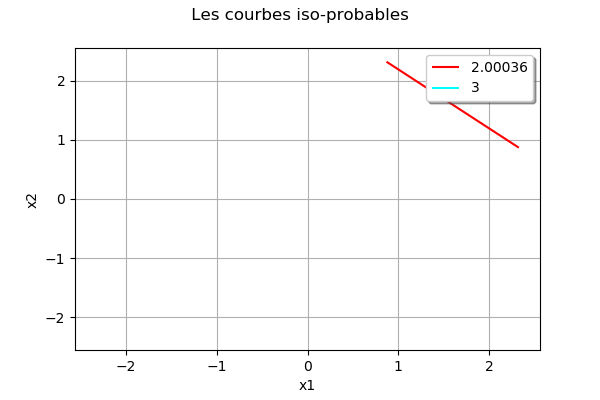

In [175]:
nbPoints = [100, 100]
figure = g3.draw(lowerBound, upperBound, nbPoints)
figure.setTitle(" Les courbes iso-probables ")
figure

## Points défaillants / fiables

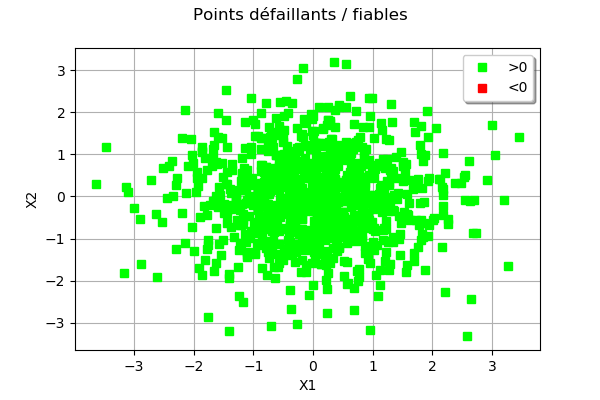

In [176]:
sampleSize = 1000
sampleInput = myDistribution.getSample(sampleSize)

e12 = sampleInput[: , 0:2]

Y = g3(e12)
Yarray = np.array(Y)
indices = Yarray > 0.0
indices = indices.ravel()
Xarray = np.array(e12)
XPositif = Xarray[indices, :]
autresIndices = [not indices[i] for i in range(len(indices))]
XNegatifs = Xarray[autresIndices, :]
myGraph = ot.Graph('Points défaillants / fiables', 'X1', 'X2', True, '')
myCloud = ot.Cloud(ot.Sample(XPositif), 'green', 'fsquare', '>0')
myGraph.add(myCloud)
myCloud = ot.Cloud(ot.Sample(XNegatifs), 'red', 'fsquare', '<0')
myGraph.add(myCloud)
myGraph.setLegendPosition("topright")
myGraph

In [177]:
def linearSample(xmin, xmax, npoints):
    '''Returns a sample created from a regular grid
    from xmin to xmax with npoints points.'''
    step = (xmax-xmin)/(npoints-1)
    rg = ot.RegularGrid(xmin, step, npoints)
    vertices = rg.getVertices()
    return vertices

## Surface d'état limite

In [178]:
lowerBound = ot.Point([X1.computeQuantile(alphaMin)[0], X2.computeQuantile(alphaMin)[0]])
upperBound = ot.Point([X1.computeQuantile(alphaMax)[0], X2.computeQuantile(alphaMax)[0]])
bounds = ot.Interval(lowerBound, upperBound)
nX = 100
nY = 100
boxExperiment = ot.Box([nX, nY], bounds)
#grille régulier 
inputSample = boxExperiment.generate()
outputSample = g3(inputSample)

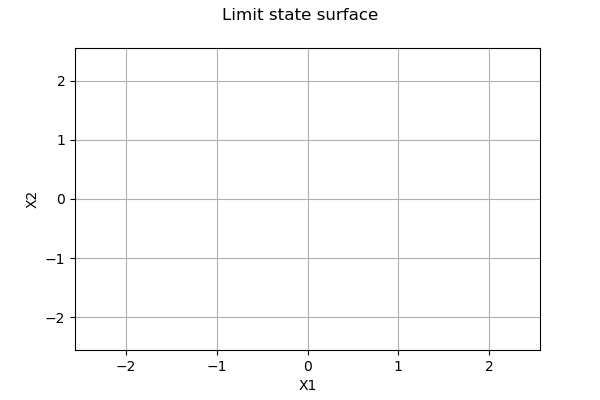

In [179]:
# Create an empty graph
myGraph = ot.Graph('Limit state surface', 'X1', 'X2', True, '')
# Create the contour
levels = ot.Point([0.0])
labels = ["0.0"]
drawLabels = True
x = linearSample(lowerBound[0], upperBound[0], nX + 2)
y = linearSample(lowerBound[1], upperBound[1], nY + 2)
myContour = ot.Contour(x, y, outputSample, levels, labels, drawLabels)
myContour.setColor('black')
myGraph.add(myContour)

myGraph

## Les courbes iso-probables 

In [180]:
alphaMin = 0.01
alphaMax = 1 - alphaMin
lowerBound = ot.Point([X1.computeQuantile(alphaMin)[0], X3.computeQuantile(alphaMin)[0]])
upperBound = ot.Point([X1.computeQuantile(alphaMax)[0], X3.computeQuantile(alphaMax)[0]])

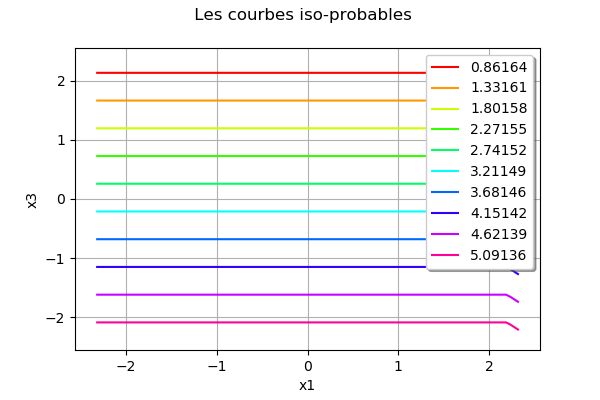

In [181]:
nbPoints = [100, 100]
figure = g2.draw(lowerBound, upperBound, nbPoints)
figure.setTitle(" Les courbes iso-probables")
figure

## Points défaillants / fiables

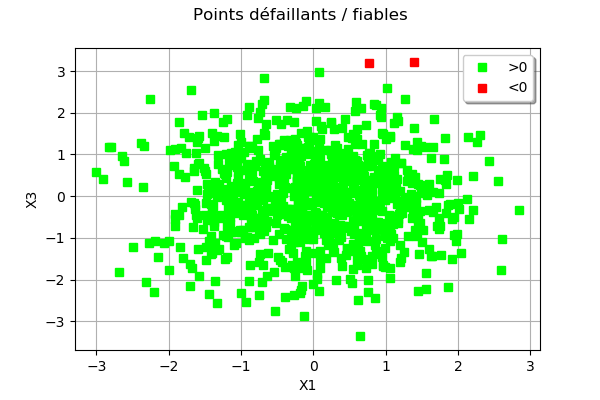

In [182]:
sampleSize = 1000
sampleInput = myDistribution.getSample(sampleSize)
Xa = np.array(sampleInput)
k = Xa[: , [0, 2]]

e13 = ot.Sample(k)
 

Y = g2(e13)
Yarray = np.array(Y)
indices = Yarray > 0.0
indices = indices.ravel()
Xarray = np.array(e13)
XPositif = Xarray[indices, :]
autresIndices = [not indices[i] for i in range(len(indices))]
XNegatifs = Xarray[autresIndices, :]
myGraph = ot.Graph('Points défaillants / fiables', 'X1', 'X3', True, '')
myCloud = ot.Cloud(ot.Sample(XPositif), 'green', 'fsquare', '>0')
myGraph.add(myCloud)
myCloud = ot.Cloud(ot.Sample(XNegatifs), 'red', 'fsquare', '<0')
myGraph.add(myCloud)
myGraph.setLegendPosition("topright")
myGraph

## Surface d'état limite

In [183]:
lowerBound = ot.Point([X1.computeQuantile(alphaMin)[0], X3.computeQuantile(alphaMin)[0]])
upperBound = ot.Point([X1.computeQuantile(alphaMax)[0], X3.computeQuantile(alphaMax)[0]])
bounds = ot.Interval(lowerBound, upperBound)
nX = 100
nY = 100
boxExperiment = ot.Box([nX, nY], bounds)
#grille régulier 
inputSample = boxExperiment.generate()
outputSample = g2(inputSample)

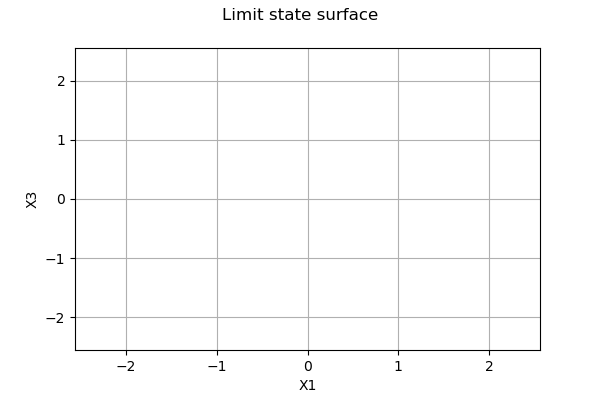

In [184]:
# Create an empty graph
myGraph = ot.Graph('Limit state surface', 'X1', 'X3', True, '')
# Create the contour
levels = ot.Point([0.0])
labels = ["0.0"]
drawLabels = True
x = linearSample(lowerBound[0], upperBound[0], nX + 2)
y = linearSample(lowerBound[1], upperBound[1], nY + 2)
myContour = ot.Contour(x, y, outputSample, levels, labels, drawLabels)
myContour.setColor('black')
myGraph.add(myContour)

myGraph

## Les courbes iso-probables

In [185]:
alphaMin = 0.01
alphaMax = 1 - alphaMin
lowerBound = ot.Point([X2.computeQuantile(alphaMin)[0], X3.computeQuantile(alphaMin)[0]])
upperBound = ot.Point([X2.computeQuantile(alphaMax)[0], X3.computeQuantile(alphaMax)[0]])

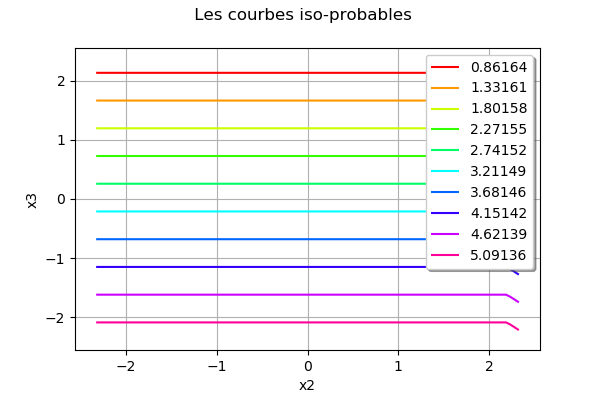

In [186]:
nbPoints = [100, 100]
figure = g1.draw(lowerBound, upperBound, nbPoints)
figure.setTitle(" Les courbes iso-probables")
figure

## Points défaillants / fiables

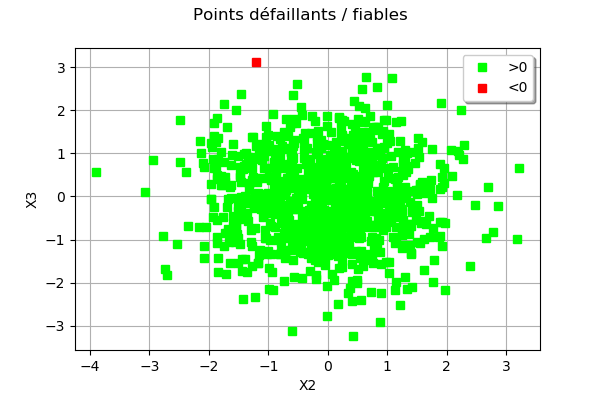

In [187]:
sampleSize = 1000
sampleInput = myDistribution.getSample(sampleSize)

e23 = sampleInput[: , 1:3]

Y = g1(e23)
Yarray = np.array(Y)
indices = Yarray > 0.0
indices = indices.ravel()
Xarray = np.array(e23)
XPositif = Xarray[indices, :]
autresIndices = [not indices[i] for i in range(len(indices))]
XNegatifs = Xarray[autresIndices, :]
myGraph = ot.Graph('Points défaillants / fiables', 'X2', 'X3', True, '')
myCloud = ot.Cloud(ot.Sample(XPositif), 'green', 'fsquare', '>0')
myGraph.add(myCloud)
myCloud = ot.Cloud(ot.Sample(XNegatifs), 'red', 'fsquare', '<0')
myGraph.add(myCloud)
myGraph.setLegendPosition("topright")
myGraph

## Surface d'état limite

In [188]:
lowerBound = ot.Point([X2.computeQuantile(alphaMin)[0], X3.computeQuantile(alphaMin)[0]])
upperBound = ot.Point([X2.computeQuantile(alphaMax)[0], X3.computeQuantile(alphaMax)[0]])
bounds = ot.Interval(lowerBound, upperBound)
nX = 100
nY = 100
boxExperiment = ot.Box([nX, nY], bounds)
#grille régulier 
inputSample = boxExperiment.generate()
outputSample = g1(inputSample)

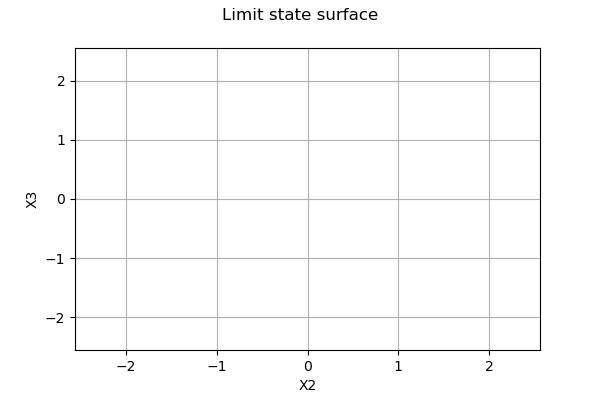

In [189]:
# Create an empty graph
myGraph = ot.Graph('Limit state surface', 'X2', 'X3', True, '')
# Create the contour
levels = ot.Point([0.0])
labels = ["0.0"]
drawLabels = True
x = linearSample(lowerBound[0], upperBound[0], nX + 2)
y = linearSample(lowerBound[1], upperBound[1], nY + 2)
myContour = ot.Contour(x, y, outputSample, levels, labels, drawLabels)
myContour.setColor('black')
myGraph.add(myContour)

myGraph